# 1.0 Using Machine Learning to Determine Predictability of NHL Stanley Cup Winners Based on Regular Season Data

![image.png](attachment:image.png)


## 1.1 Background And Motivation
The National Hockey League crowns its winner every year by awarding the Stanley Cup to the champion of the league playoffs. In a 31 team league (30 teams prior to the 2017-2018 season), 16 teams make the playoffs, where a team must win four best-of-seven series' to become the champion. In past years, these winners have seemed to show little to no correlation to regular season performance, and guessing a winner is often attributed to luck. Despite this believe, there is reason to believe that this is not the case, and a deeper look into statistics is just required to determine a winner. 

If successful, this model can be applied to gambling, where bets can be made corresponding to the results of the model, in hopes of accurately predicting a winner to gain a profit.

## 1.2 Purpose
The purpose of this project is to determine whether a team's regular season statistics are indicative of how they will perform in the playoffs. 

## 1.3 Methodology
The data was collected from http://www.nhl.com/stats/teamsaggregate=0&reportType=season&seasonFrom=20102011&seasonTo=20192020&gameType=2&filter=gamesPlayed,gte,1&sort=points,wins&page=0&pageSize=50 and https://stathead.com/hockey/tpbp_finder.cgi#stats::none, with the former being regular season and playoff data for individual teams, and the latter being advanced regular season analytics. The data was collected from the past 10 NHL seasons, excluding the 2019-2020 NHL season (which was shortened due to COVID). 

With the use of machine learning and PCAs, there is hope create a model that can predict a team's performance with accuracy based on their regular season statistics. To do this, thirty-seven regular season statistics were used. The number of components used in the model was determined by a for loop that tested the accuracy of 37 models which each had a different number of components (from 1 to 37). The best combination of components for each model was determined using a PCA. The accuracy of each of the models was then measured, and the best model (and thus the ideal number of components) was determined.\

Next, three paramaters were tested using GridSearchCV to determine the best paramater of the given inputs. The three parameters tested were the gamma value, the C value, and the kernel type (linear or rbf). Once the ideal values were determined, a model was created (using the paramater values determined by GridSearchCV) and the accuracy could be tested. 

To determine whether the model was successful in its prediction or not, a goal of an accuracy score of 0.80 was set. 

## README


## 1.4   General Statistics
In the first step, general statistics that are available to the public will be imported and analyzed. The statistics being tested will be as follows:

Goals Against Per Game (GA/GP): The expectation is that there will be a strong negative correlation between Goals Against Per Game and Win percentage, as the more goals a team allows often results in a higher probability of that team losing.

Plus-Minus: This is a statistic that measures the net goals for a team (a team's goals minus the goals they have allowed). The expectation is that there will be a strong positive correlation between plus-minus and win percentage since it provides a macroscopic view of the net score in a hockey game. 

Shots/game: This is a statistic that measures the average amount of shots taken on net by a team in a game. Once again, it is expected that there will be a strong correlation between the amount of shots taken in a game and the win percentage of a hockey team, since the more shots a team generates, the more opportunities they have to score. 

Faceoff Win Percentage: This is a statistic that measures the percentage of times a team wins a faceoff (which occurs at the start of every play in hockey). Since this is an indirect measurement of possesion of the puck, it is expected that there will be a positive correlation between faceoff win percentage and win percentage; however, it is not expected to be a strong correlation due to the many changes of possesion that occur during a hockey game. 

## 1.5 Importing Regular Season Data
The Regular season data acquired from http://www.nhl.com/stats/teamsaggregate=0&reportType=season&seasonFrom=20102011&seasonTo=20192020&gameType=2&filter=gamesPlayed,gte,1&sort=points,wins&page=0&pageSize=50 and the advanced analytics acquired from  https://stathead.com/hockey/tpbp_finder.cgi#stats::none are imported below into the dataframes "nhl_data" and "advanced", repectively.

In [33]:
#Import necessary Modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [34]:
nhl_data = pd.read_excel("NHL_2010-2020_Data.xlsx") # Import Regular Season Data
nhl_data = nhl_data.replace(to_replace='--', value=0) # replace tie data with no values to zero
nhl_data = nhl_data.replace(to_replace="Phoenix Coyotes", value="Arizona Coyotes") # update team name changes to account for relocation
nhl_data.head()

,Team,Season,GP,W,L,T,OT,P,P%,RW,...,GA,GF/GP,GA/GP,PP%,PK%,Net PP%,Net PK%,Shots/GP,SA/GP,FOW%
0,Tampa Bay Lightning,20182019,82,62,16,0,4,128,0.780,49,...,221,3.89,2.70,28.2,85.0,27.1,89.5,32.0,32.1,51.2
1,Washington Capitals,20152016,82,56,18,0,8,120,0.732,45,...,191,3.02,2.33,21.9,85.2,19.9,85.9,30.6,28.4,49.6
2,Washington Capitals,20162017,82,55,19,0,8,118,0.720,45,...,177,3.18,2.16,23.1,83.8,21.9,85.7,30.4,27.8,49.8
3,Boston Bruins,20132014,82,54,19,0,9,117,0.713,47,...,171,3.15,2.09,21.7,83.7,19.1,87.1,31.9,29.1,51.6
4,Vancouver Canucks,20102011,82,54,19,0,9,117,0.713,46,...,180,3.15,2.20,24.3,85.6,23.7,87.5,32.0,30.1,54.9


In [35]:
advanced = pd.read_csv("Advanced_Analytics_2010-2020.csv", header=1) # import advanced analytics data
advanced.head()

,Rk,Tm,Season,CF,CA,CF%,FF,FA,FF%,oiSH%,oiSV%,PDO,oZS%,dZS%,FOW,FOL,FO%,HIT,BLK
0,1.0,TOR,2018-19,4588.0,4313.0,51.5,3359.0,3347.0,50.1,10.2,91.6,101.8,50.4,49.6,2239.0,1971.0,53.2,1347.0,966.0
1,2.0,MTL,2018-19,4542.0,3880.0,53.9,3287.0,2881.0,53.3,8.7,91.2,99.9,51.7,48.3,1991.0,2084.0,48.9,2096.0,999.0
2,3.0,CAR,2018-19,4521.0,3720.0,54.9,3428.0,2811.0,54.9,8.0,91.5,99.5,53.6,46.4,2019.0,2071.0,49.4,1956.0,909.0
3,4.0,CAR,2017-18,4487.0,3727.0,54.6,3291.0,2866.0,53.5,7.6,90.1,97.7,56.7,43.3,2172.0,1867.0,53.8,1528.0,861.0
4,5.0,CHI,2017-18,4458.0,4018.0,52.6,3125.0,2994.0,51.1,7.7,91.2,98.9,55.5,44.5,2021.0,2105.0,49.0,1315.0,1024.0


## 1.6 Data Cleaning
In the below cells, the data is cleaned and organized so that it is ready to be used in an SVM. Detailed comments at the top of each cell below describes what the purpose of each cell of code is, so that the reader can follow along easily with what cleaning is being done. Furthermore, the data is displayed multiple times in the following cells so that the changes can be visualized. 

In [36]:
season_arr = np.array(advanced["Season"]) #Storing seasons of each team's data in separate array
print(season_arr) # visualize seasons

['2018-19' '2018-19' '2018-19' '2017-18' '2017-18' '2018-19' '2017-18'
 '2013-14' '2015-16' '2014-15' '2014-15' '2015-16' '2017-18' '2018-19'
 '2017-18' '2017-18' '2014-15' 'Dec-11' '2017-18' 'Dec-11' '2016-17'
 '2017-18' '2018-19' '2016-17' '2016-17' '2016-17' '2017-18' '2017-18'
 '2013-14' '2013-14' 'Dec-11' '2013-14' '2018-19' '2017-18' '2014-15'
 '2017-18' 'Nov-10' '2014-15' '2018-19' '2014-15' '2017-18' '2018-19'
 '2013-14' '2015-16' 'Nov-10' '2013-14' '2017-18' '2016-17' '2014-15'
 '2018-19' '2017-18' '2017-18' '2013-14' '2016-17' 'Dec-11' '2015-16'
 'Nov-10' '2016-17' '2018-19' '2014-15' '2018-19' '2016-17' '2017-18'
 '2016-17' 'Dec-11' '2016-17' '2016-17' '2016-17' '2017-18' '2018-19'
 '2015-16' '2018-19' 'Dec-11' '2018-19' '2013-14' '2013-14' '2017-18'
 'Dec-11' '2017-18' '2015-16' '2018-19' 'Dec-11' 'Nov-10' '2018-19'
 '2015-16' '2018-19' 'Dec-11' '2015-16' 'Nov-10' 'Nov-10' '2013-14'
 '2015-16' '2018-19' '2015-16' 'Nov-10' '2017-18' '2016-17' '2018-19'
 '2017-18' '2018-19' '

In [37]:
# Changing dates in the advanced dataframe to match that of the nhl_data dataframe

advanced_dates = ["Nov-10", "Dec-11", "2012-13", "2013-14", "2014-15", "2015-16", "2016-17", "2017-18",
                  "2018-19", "2019-20"]
nhl_dates = [np.int64(20102011), np.int64(20112012), np.int64(20122013), np.int64(20132014), np.int64(20142015),
             np.int64(20152016), np.int64(20162017), np.int64(20172018), np.int64(20182019), np.int64(20192020)]

for i in range(len(advanced_dates)):
    advanced["Season"].replace(to_replace = advanced_dates[i], value = nhl_dates[i], inplace=True)
advanced.dropna(axis=0, inplace=True)
advanced["Season"] = advanced["Season"].astype(int)

In [38]:
# Changing the short form of the team names to their full form, to keep the names uniform between the two datasets
advanced_teams = ["MTL", "TOR", "VEG", "CAR", "CGY", "NSH", "SJS", "LAK", "CHI", "COL", "TBL", "PIT", "BOS", "WSH",
                  "WPG", "ATL", "MTL", "PHX", "ARI", "MIN", "CBJ", "FLA", "OTT", "STL", "DAL", "PHI", "ANA", "VAN",
                  "BUF", "EDM", "NYI", "NYR", "DET", "NJD"]
nhl_teams = ["Montréal Canadiens", "Toronto Maple Leafs", "Vegas Golden Knights", "Carolina Hurricanes", "Calgary Flames",
             "Nashville Predators", "San Jose Sharks", "Los Angeles Kings", "Chicago Blackhawks", "Colorado Avalanche",
             "Tampa Bay Lightning", "Pittsburgh Penguins", "Boston Bruins", "Washington Capitals", "Winnipeg Jets",
             "Atlanta Thrashers", "Montréal Canadiens", "Arizona Coyotes", "Arizona Coyotes", "Minnesota Wild",
             "Columbus Blue Jackets", "Florida Panthers", "Ottawa Senators", "St. Louis Blues", "Dallas Stars",
             "Philadelphia Flyers", "Anaheim Ducks", "Vancouver Canucks", "Buffalo Sabres", "Edmonton Oilers",
             "New York Islanders", "New York Rangers", "Detroit Red Wings", "New Jersey Devils"]

for i in range(len(advanced_teams)):
    advanced["Tm"].replace(to_replace = advanced_teams[i], value = nhl_teams[i], inplace=True)
print(advanced["Tm"])
print(nhl_data["Team"])

0        Toronto Maple Leafs
1         Montréal Canadiens
2        Carolina Hurricanes
3        Carolina Hurricanes
4         Chicago Blackhawks
               ...          
298      Tampa Bay Lightning
299    Columbus Blue Jackets
300           Buffalo Sabres
301      Nashville Predators
302          Edmonton Oilers
Name: Tm, Length: 303, dtype: object
0      Tampa Bay Lightning
1      Washington Capitals
2      Washington Capitals
3            Boston Bruins
4        Vancouver Canucks
              ...         
298    Nashville Predators
299    Tampa Bay Lightning
300      Detroit Red Wings
301     Colorado Avalanche
302       Florida Panthers
Name: Team, Length: 303, dtype: object


In [39]:
# Sorting the advanced frame first by season and then by team
advanced.sort_values(by=["Season", "Tm"], axis=0, ascending=True, inplace=True, ignore_index=True)
print(advanced.shape)
advanced.head()

(303, 19)


,Rk,Tm,Season,CF,CA,CF%,FF,FA,FF%,oiSH%,oiSV%,PDO,oZS%,dZS%,FOW,FOL,FO%,HIT,BLK
0,256.0,Anaheim Ducks,20102011,3222.0,4010.0,44.6,2510.0,3038.0,45.2,8.8,92.0,100.8,49.8,50.2,1699.0,1860.0,47.7,1785.0,972.0
1,117.0,Arizona Coyotes,20102011,3852.0,3829.0,50.1,2902.0,2977.0,49.4,8.5,92.8,101.4,48.1,51.9,2027.0,1845.0,52.4,1720.0,852.0
2,151.0,Atlanta Thrashers,20102011,3771.0,3945.0,48.9,2857.0,2864.0,49.9,7.4,91.5,98.9,51.1,48.9,1797.0,1894.0,48.7,1385.0,1081.0
3,45.0,Boston Bruins,20102011,4067.0,3948.0,50.7,2992.0,2964.0,50.2,8.5,93.8,102.3,48.2,51.8,1974.0,1820.0,52.0,1612.0,984.0
4,125.0,Buffalo Sabres,20102011,3834.0,3752.0,50.5,2913.0,2808.0,50.9,8.3,91.8,100.2,53.6,46.4,1712.0,1919.0,47.1,1406.0,944.0


In [40]:
# Sorting the nhl_data frame first by season and then by team
nhl_data.sort_values(by=["Season", "Team"], axis=0, ascending=True, inplace=True, ignore_index=True)
print(nhl_data.shape)
nhl_data.head()

(303, 23)


,Team,Season,GP,W,L,T,OT,P,P%,RW,...,GA,GF/GP,GA/GP,PP%,PK%,Net PP%,Net PK%,Shots/GP,SA/GP,FOW%
0,Anaheim Ducks,20102011,82,47,30,0,5,99,0.604,34,...,233,2.87,2.84,23.5,81.3,21.1,83.6,28.5,32.3,47.7
1,Arizona Coyotes,20102011,82,43,26,0,13,99,0.604,36,...,220,2.76,2.68,15.9,78.4,13.8,80.1,30.3,32.6,51.5
2,Atlanta Thrashers,20102011,82,34,36,0,12,80,0.488,19,...,262,2.66,3.20,18.3,77.5,14.9,79.7,31.5,32.2,48.7
3,Boston Bruins,20102011,82,46,25,0,11,103,0.628,43,...,189,2.98,2.30,16.2,82.6,14.3,86.8,32.9,32.7,51.9
4,Buffalo Sabres,20102011,82,43,29,0,10,96,0.585,28,...,228,2.93,2.78,19.4,83.0,14.7,83.7,32.8,30.7,47.7


In [41]:
# Merging the two dataframes together

names = ["CF", "CA", "CF%", "FF", "FA", "FF%", "oiSH%", "oiSV%", "PDO", "oZS%", "dZS%", "FOW", "FOL", "FO%",
         "HIT", "BLK"]
cols = [advanced["CF"], advanced["CA"], advanced["CF%"], advanced["FF"], advanced["FA"], advanced["FF%"],
        advanced["oiSH%"], advanced["oiSV%"], advanced["PDO"], advanced["oZS%"], advanced["dZS%"], advanced["FOW"],
        advanced["FOL"], advanced["FO%"], advanced["HIT"], advanced["BLK"]]

for i in range(len(names)):
    index = len(nhl_data.columns)
    nhl_data.insert(loc=index, column=names[i], value=cols[i])

## 1.6 Importing and Cleaning Playoff Data

The cells below import and clean the playoff data that corresponds to the regular season data imported in section 1.5. A new column is then created to include numbers for classification. This process is explained through thorough comments in the cell below. 

In [42]:
# Read in PLayoff Data
playoff_data = pd.read_excel("playoff_data_full.xlsx", usecols=["Team", "Season", "W"])
playoff_data["Class"] = 0
playoff_data.drop

for i in range(0,len(playoff_data["W"])):
    if playoff_data["W"][i] == 16:
        playoff_data["Class"][i] = 5  # indicates stanley cup champion
    if playoff_data["W"][i] > 11 and playoff_data["W"][i] < 16:
        playoff_data["Class"][i] = 4  # indicates stanley cup finalist
        
    if playoff_data["W"][i] > 7 and playoff_data["W"][i] < 12:
        playoff_data["Class"][i] = 3  # indicates Conference Finalist
        
    if playoff_data["W"][i] > 3 and playoff_data["W"][i] < 8:
        playoff_data["Class"][i] = 2  # Second round team
        
    if playoff_data["W"][i] < 4:
        playoff_data["Class"][i] = 1  # First round team

In [43]:
#add new class column to nhl_data
#set each index to 0 (indicating the team missed the playoffs)
nhl_data["Class"] = 0

#loop through nhl_data and playoff data to correctly match and append the correct classification to each team, based on their 
#name and the year of the season the statistics are from
for i in range(0, len(nhl_data["Team"])):
    for j in range(0, len(playoff_data["Season"])):
                if nhl_data["Season"][i] == playoff_data["Season"][j] and nhl_data["Team"][i] == playoff_data["Team"][j]:
                    nhl_data["Class"][i] = playoff_data["Class"][j]

In [44]:
#create a features Dataframe and labels dataframe
features = nhl_data.drop(["Team", "Season", "Class"], axis = 1)
labels = nhl_data["Class"]

# 2.0 Classification

## 2.1 Necessary Imports and Separating Data
Using the Stratified Shuffle split, the cells below split the data into testing data and training data. Since the data was relatively limeted, the stratified shuffle split allowed to ensure for a sufficient number of data points for each class in the training data. 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

In [46]:
'''This function works similar to train_test_split excpet it uses a stratified random sample. This is necessary for our 
data becuase our classes do not have an even distribution. There are about two hundred teams with class 0 (didn't make
playoffs) and only 10 Stanley Cup Champions.
'''
sss = StratifiedShuffleSplit(n_splits = 1, test_size=.25, random_state=1234)
for train_index, test_index in sss.split(features, labels):
    #print("TRAIN:", train_index, "TEST:", test_index)       
        
    train_vectors, test_vectors = features.iloc[train_index], features.iloc[test_index]
    train_labels, test_labels = labels[train_index], labels[test_index]

print(train_vectors)


     GP   W   L  T  OT    P     P%  RW  ROW  S/O Win  ...  oiSH%  oiSV%  \
56   82  35  37  0  10   80  0.488  26   31        4  ...    8.9   90.6   
76   48  16  23  0   9   41  0.427  11   14        2  ...    7.9   91.8   
68   48  24  17  0   7   55  0.573  14   19        5  ...    8.6   92.9   
121  82  24  50  0   8   56  0.341  14   19        5  ...    5.8   91.1   
212  82  50  20  0  12  112  0.683  41   47        3  ...    8.9   91.7   
..   ..  ..  .. ..  ..  ...    ...  ..  ...      ...  ...    ...    ...   
84   48  29  17  0   2   60  0.625  20   24        5  ...    8.3   91.3   
101  82  29  44  0   9   67  0.409  20   25        4  ...    8.3   90.6   
169  82  46  27  0   9  101  0.616  39   43        3  ...    9.7   92.5   
211  82  29  41  0  12   70  0.427  20   27        2  ...    8.0   91.3   
205  82  42  30  0  10   94  0.573  32   38        4  ...    8.2   91.8   

       PDO  oZS%  dZS%     FOW     FOL   FO%     HIT     BLK  
56    99.5  50.1  49.9  1904.0  1862

## 2.2 Optimizing Number of Components Using PCA
The cells below create a 2 dimensional list that stores both the amount of components for a given model and the model's accuracy score. A for loop is run, which creates new training vectors with a limited number of components (the number of components will range from 1 to 37, which is the total number of statistics in the data). A model is created using the pca vectors that are made, and the accuracy score and corresponding number of components are stored in the "accuracy" list.

This data is then plotted to help visualize how the number of components relates to the accuracy score, and helps to determine the ideal number of components given the statistics available in the data. 

In [47]:
'''We have 37 components in our data, so we loop through 1-37 component pca's looking for the best results.
'''
accuracy = []
for i in range(1, len(features.columns) + 1): # loop through numbers from 1 to 37
    pca = PCA(n_components=i, whiten=True)
    pca_fit = pca.fit(train_vectors)

    pca_train_vectors = pca.transform(train_vectors)
    pca_test_vectors = pca.transform(test_vectors)
    
    model = SVC(C=10, gamma = 1e-06, kernel="linear")
    fit = model.fit(pca_train_vectors, train_labels)

    predict_vectors = pca_test_vectors
    true_labels = test_labels

    pred_labels = fit.predict(predict_vectors)

    accuracy.append([fit.score(predict_vectors, true_labels), i])

0.6973684210526315 (array([17]),)


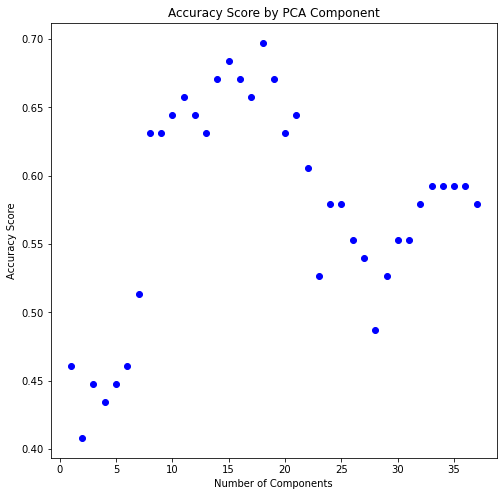

In [48]:
# Plotting the PCA results
accuracy = np.array(accuracy)
plt.figure(figsize=(8, 8))
plt.scatter(accuracy[:,1], accuracy[:,0], color="blue")
plt.xlabel("Number of Components")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score by PCA Component")

maximum = np.max(accuracy[:,0])
index = np.where(accuracy[:,0] == maximum)
print(maximum, index)

### 2.2.1 Choosing a number of Components
Evident by the print statement above, 18 components yields an accuracy score of approximately 0.697. Since this is the highest accuracy score acheived, the model will be created using the 18 components determined by running a PCA. 

In [49]:
# Implementing the best pca and transforming the data
components = 18 #see 2.1.1 for description

pca = PCA(n_components=components, whiten=True) # run final PCA
pca_fit = pca.fit(train_vectors)

pca_train_vectors = pca.transform(train_vectors)
pca_test_vectors = pca.transform(test_vectors)

## 2.3 Analysis
With the current model, an accuracy score of 0.697 is acheived. While this shows strong accuracy, it is believed that the model can be further improved.

## 2.3 Optimizing Parameters
Below, GridSearchCV is given multiple inputs of varying parameters to determine which parameters will maximize the accuracy of the model. These new parameters are then implemented into a new model, in attempt to create a model more accurate than the previous one (see 2.2.1), which yielded a score of 0.697. 

In [50]:
# Searching through the parameters
param_grid = {'C': [1e3, 0.01, 1, 10, 100],
                  'gamma': [1e-6, 1e-5, 1e-41, 1e-35, 0.01, 0.1],
                    'kernel' : ["linear", "rbf"]}
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)
clf = clf.fit(pca_train_vectors, train_labels)
print(clf.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [51]:
# Creating the SVC model based on the GridSearchCV parameters and evaluating the results
model = SVC(C=1, gamma = 0.1, kernel="linear")
fit = model.fit(pca_train_vectors, train_labels)

predict_vectors = pca_test_vectors
true_labels = test_labels

pred_labels = fit.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(5)))
print(fit.score(predict_vectors, true_labels))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.53      0.95      0.68        20
           2       0.43      0.27      0.33        11
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2

    accuracy                           0.67        76
   macro avg       0.31      0.34      0.31        76
weighted avg       0.62      0.67      0.63        76

[[29  5  1  0  0]
 [ 1 19  0  0  0]
 [ 2  6  3  0  0]
 [ 0  1  3  0  0]
 [ 0  3  0  0  0]]
0.6710526315789473


### 2.3.1 GridSearchCV Analysis
Evident by the confusion matrix and accuracy score printed above, the parameters defined by the GridSearch Analysis did not give parameters that more accurately predicted, as the accuracy score from the updated model was, surprisingly, over 0.02 lower than that of the original. 

### 2.3.2 Manually Optimizing the Model
Since the GridSearchCV was not effective in improving the parameters of the model, a for loop (with another for loop inside of it) was run, to see which combination of varying parameters (provided in lists below) would yield the most accurate result. 

In [52]:
# define possible parameters
C = [1e3, 0.01, 0.1, 1, 10, 100]
gamma = [1e-6, 1e-5, 1e-41, 0.01, 0.1]
degrees = [1,2,3,4,5]
accuracy = []

# loop through possible parameter combinations
for i in range(0,5):
    C_val = C[i]
    
    for j in range(0,5):
        gam = gamma[j]
        
        for k in range(0,5):
            degree = degrees[k]

            model = SVC(C=C_val, gamma = gam, degree = degree, kernel="linear") # create linear model
            fit = model.fit(pca_train_vectors, train_labels)

            predict_vectors = pca_test_vectors
            true_labels = test_labels

            pred_labels = fit.predict(predict_vectors)

            accuracy.append([fit.score(predict_vectors, true_labels), gam, degree, C_val, "Linear"]) # append accuracy scores and corresponding parameters
            
            
# loop through possible parameter combinations
for i in range(0,5):
    C_val = C[i]
    
    for j in range(0,5):
        gam = gamma[j]
        
        for k in range(0,5):
            degree = degrees[k]

            model = SVC(C=C_val, gamma = gam, degree = degree, kernel="rbf") # create rbf model
            fit = model.fit(pca_train_vectors, train_labels)

            predict_vectors = pca_test_vectors
            true_labels = test_labels

            pred_labels = fit.predict(predict_vectors)

            accuracy.append([fit.score(predict_vectors, true_labels), gam, degree, C_val, "rbf"])   # append accuracy scores and corresponding parameters
            
        
max(accuracy)

[0.7105263157894737, 0.1, 5, 1000.0, 'Linear']

In [53]:
model = SVC(C=1000, gamma = 0.1, degree = 5, kernel="linear")
fit = model.fit(pca_train_vectors, train_labels)

predict_vectors = pca_test_vectors
true_labels = test_labels

pred_labels = fit.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(5)))
print(fit.score(predict_vectors, true_labels))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        35
           1       0.62      0.90      0.73        20
           2       0.43      0.27      0.33        11
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2

    accuracy                           0.71        76
   macro avg       0.32      0.35      0.33        76
weighted avg       0.63      0.71      0.66        76

[[33  2  0  0  0]
 [ 1 18  1  0  0]
 [ 2  6  3  0  0]
 [ 0  1  2  0  1]
 [ 1  2  0  0  0]]
0.7105263157894737


### 2.3.2 Analysis
Evident above, the model was improved to earn an accuracy score of 0.71, which is the highest score acheived thus far. 

## 2.4 Implementing Random Forest Classifier
Using the SVC model created above, an accuracy score of 0.71 was acheived. While that was a common method of classification, there are others that can be implemented that may yield better results. To test this, the random forest classifier was used, which is a more advanced machine learning model. This implementation is in the following cells. 

In [54]:
'''Here a different learning model called a random forest is implemented. This is a more advanced learning model
belonging to a class known as ensemble methods.'''

rf = RandomForestClassifier(n_estimators=5000, max_depth=7)
rf.fit(X=pca_train_vectors, y=train_labels)

predictions = rf.predict(pca_test_vectors)
print(predictions)
error = metrics.mean_absolute_error(test_labels, predictions)
r_squared = metrics.r2_score(test_labels, predictions)

print(error, r_squared)

[1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1
 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0
 0 1]
0.7236842105263158 -0.06500895585291344


In [55]:
print(classification_report(test_labels, predictions))
print(confusion_matrix(test_labels, predictions, labels=range(5)))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77        35
           1       0.44      0.80      0.57        20
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2

    accuracy                           0.59        76
   macro avg       0.19      0.27      0.22        76
weighted avg       0.45      0.59      0.51        76

[[29  6  0  0  0]
 [ 4 16  0  0  0]
 [ 4  7  0  0  0]
 [ 1  4  0  0  0]
 [ 1  2  0  0  0]]


### 2.4.1 Analysis
Evident above, the Random Forest Model was less accurate than the SVC model created in section 2.3.2. This is likely due to the complexity of the Random Forest Model and the relatively low amount of data available for the model. Thus, for the final prediction (section 3.0.0), the model from section 2.3.2 will be used. 

# 3.0 Prediction

## 3.1 Importing Current Season Data
The cells below import the regular season data from the 2020-2021 NHL Regular Season. It is important to note that these statistics are from April 20, 2021, and do not reflect any statistics from later dates. Both standard regular season data and advanced metrics from the regular season are imported and appended into one dataframe, so that the data is ready to be input into the SVC model from section 2.3.2

In [56]:
# Importing standard regular season NHL data from current season
nhl_pred_data = pd.read_csv("nhl_data_2020-21.csv")
nhl_pred_data.sort_values(by=["Team"], axis=0, ascending=True, inplace=True, ignore_index=True)
print(nhl_pred_data.shape)
nhl_pred_data.head()

(31, 23)


,Team,Season,GP,W,L,T,OT,P,P%,RW,...,GA,GF/GP,GA/GP,PP%,PK%,Net PP%,Net PK%,Shots/GP,SA/GP,FOW%
0,Anaheim Ducks,20202021,46,14,25,--,7,35,0.380,9,...,145,2.22,3.15,10.7,78.8,6.8,80.3,26.9,31.2,51.2
1,Arizona Coyotes,20202021,45,20,20,--,5,45,0.500,16,...,139,2.62,3.09,20.0,79.7,17.3,81.2,26.6,30.8,47.7
2,Boston Bruins,20202021,43,25,12,--,6,56,0.651,18,...,108,2.81,2.51,22.0,85.7,18.2,91.2,32.3,27.6,55.6
3,Buffalo Sabres,20202021,45,12,26,--,7,31,0.344,9,...,151,2.40,3.36,21.4,78.3,19.6,81.7,27.8,32.8,50.3
4,Calgary Flames,20202021,44,19,22,--,3,41,0.466,16,...,128,2.61,2.91,20.0,81.2,17.1,82.6,29.9,29.0,50.2


In [57]:
# Advanced metrics for this season
advanced_pred_data = pd.read_csv("advanced_data_2020-21.csv", skiprows=1)

for i in range(len(advanced_teams)):
    advanced_pred_data["Tm"].replace(to_replace = advanced_teams[i], value = nhl_teams[i], inplace=True)

advanced_pred_data.sort_values(by=["Tm"], axis=0, ascending=True, inplace=True, ignore_index=True)
print(advanced_pred_data.shape)
advanced_pred_data.head()

(31, 19)


,Rk,Tm,Season,CF,CA,CF%,FF,FA,FF%,oiSH%,oiSV%,PDO,oZS%,dZS%,FOW,FOL,FO%,HIT,BLK
0,11,Anaheim Ducks,2020-21,2038,2195,48.1,1496,1647,47.6,8.5,90.6,99.1,49.1,50.9,1105,1037,51.6,1031,548
1,23,Arizona Coyotes,2020-21,1915,2102,47.7,1418,1567,47.5,8.7,90.5,99.2,47.7,52.3,948,1034,47.8,1050,535
2,12,Boston Bruins,2020-21,2020,1783,53.1,1582,1356,53.8,7.2,91.3,98.6,53.1,46.9,1054,871,54.8,1002,427
3,22,Buffalo Sabres,2020-21,1930,2165,47.1,1505,1720,46.7,7.5,90.1,97.5,48.9,51.1,1015,1024,49.8,780,445
4,10,Calgary Flames,2020-21,2053,1880,52.2,1527,1439,51.5,7.9,90.6,98.5,53.9,46.1,964,957,50.2,915,441


In [58]:
# Merging the two dataframes for this season
names = ["CF", "CA", "CF%", "FF", "FA", "FF%", "oiSH%", "oiSV%", "PDO", "oZS%", "dZS%", "FOW", "FOL", "FO%",
         "HIT", "BLK"]
cols = [advanced_pred_data["CF"], advanced_pred_data["CA"], advanced_pred_data["CF%"], advanced_pred_data["FF"],
        advanced_pred_data["FA"], advanced_pred_data["FF%"], advanced_pred_data["oiSH%"], advanced_pred_data["oiSV%"],
        advanced_pred_data["PDO"], advanced_pred_data["oZS%"], advanced_pred_data["dZS%"], advanced_pred_data["FOW"],
        advanced_pred_data["FOL"], advanced_pred_data["FO%"], advanced_pred_data["HIT"], advanced_pred_data["BLK"]]

for i in range(len(names)):
    index = len(nhl_pred_data.columns)
    nhl_pred_data.insert(loc=index, column=names[i], value=cols[i])
    
nhl_pred_data = nhl_pred_data.replace(to_replace='--', value=0) # replace tie data with no values to zero
nhl_pred_data.head()

## 3.2 Predicting Playoff Outcomes
Using the imported data above, the SVC is used to predict the classes of each NHL team. To review the meanings of each classification, refer to the comments in cells of section 1.6. 

In [61]:
# Running the prediction and outputting a dictionary of results
teams = np.array(nhl_pred_data["Team"])
current_season_vectors = nhl_pred_data.drop(["Team", "Season"], axis=1)
pca_current_season = pca.transform(current_season_vectors)

predictions = model.predict(pca_current_season)
results = {}
for i in range(len(teams)):
    results[teams[i]] = predictions[i]
print(results)
print(len(results.keys()))

{'Anaheim Ducks': 0, 'Arizona Coyotes': 0, 'Boston Bruins': 4, 'Buffalo Sabres': 0, 'Calgary Flames': 1, 'Carolina Hurricanes': 1, 'Chicago Blackhawks': 1, 'Colorado Avalanche': 4, 'Columbus Blue Jackets': 0, 'Dallas Stars': 1, 'Detroit Red Wings': 0, 'Edmonton Oilers': 1, 'Florida Panthers': 1, 'Los Angeles Kings': 2, 'Minnesota Wild': 3, 'Montréal Canadiens': 0, 'Nashville Predators': 3, 'New Jersey Devils': 0, 'New York Islanders': 2, 'New York Rangers': 4, 'Ottawa Senators': 0, 'Philadelphia Flyers': 0, 'Pittsburgh Penguins': 1, 'San Jose Sharks': 0, 'St. Louis Blues': 1, 'Tampa Bay Lightning': 4, 'Toronto Maple Leafs': 5, 'Vancouver Canucks': 0, 'Vegas Golden Knights': 4, 'Washington Capitals': 1, 'Winnipeg Jets': 4}
31


## 3.2.1 Plotting Distribution
The cell below plots the distribution of classifications that the model created. in an ideal scenario, class 0 would have 14 points, class 1 would have 8, class 2 would have 4, class 3 would have 2, and classes four and 5 would each have 1. 

Text(0.5, 1.0, 'Predicted Playoff Depth for Current Season')

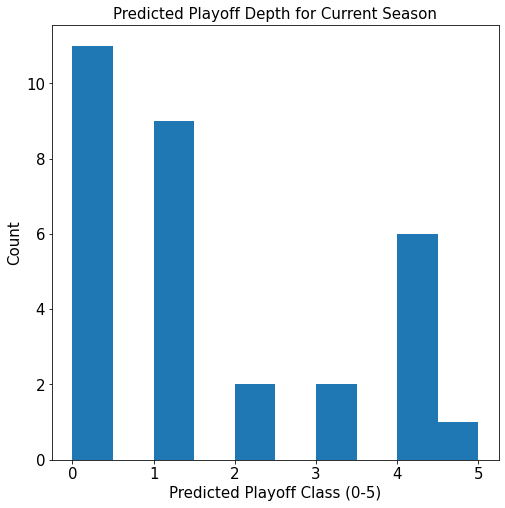

In [62]:

result_classes = list(results.values())
plt.figure(figsize=(8,8))
plt.xticks(size=15)
plt.yticks(size=15)
plt.hist(result_classes)
plt.xlabel("Predicted Playoff Class (0-5)", size=15)
plt.ylabel("Count", size=15)
plt.title("Predicted Playoff Depth for Current Season", size=15)

Deep run playoff teams are as follows:
<br>5 - Toronto Maple Leafs
<br>4 - Boston Bruins, Colorado Avalanche, New York Rangers, Tampa Bay Lightning, Vegas Golden Knights, Winnipeg Jets

In [30]:
vegas_odds = {"Colorado Avalanche": 400, "Tampa Bay Lightning": 600, "Vegas Golden Knights": 750,
              "Toronto Maple Leafs": 850, "Carolina Hurricanes": 1200, "New York Islanders": 1400,
              "Washington Capitals": 1400, "Boston Bruins": 1600}